In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../BPI2016_Clicks_Logged_In.csv", encoding_errors="ignore", on_bad_lines='skip', sep=";",
                usecols=['CustomerID', 'AgeCategory', 'Gender', 'Office_U', 'Office_W',
       'SessionID', 'IPID', 'TIMESTAMP', 'VHOST', 'URL_FILE', 'PAGE_NAME',
       'REF_URL_category', 'page_load_error', 'page_action_detail', 'tip',
       'service_detail', 'xps_info'])
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], infer_datetime_format=True)
df = df.sort_values(["SessionID", "TIMESTAMP"])
df_original = df

C:\Users\krdeg\AppData\Local\Temp\ipykernel_47784\1598719356.py:6: DtypeWarning: Columns (11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../BPI2016_Clicks_Logged_In.csv", encoding_errors="ignore", on_bad_lines='skip', sep=";",


In [2]:
#Create consecutive column with the consecutive activity and count how many time each pair occurs
df["Consecutive_1"] = df.groupby("SessionID")["URL_FILE"].shift(periods=-1)

df

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,Consecutive_1
3273278,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...
5333642,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...
3733243,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...
5904405,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...
5573282,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613546,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:17:15.947,www.werk.nl,/werk_nl/werknemer/werkmap,werkmap,UWV,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken
2925569,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:18:10.877,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken
4068602,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:18:41.493,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken
5013440,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:19:59.737,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken


In [3]:
df["pattern_2"] = (df["URL_FILE"] == "/xpsimage/wdo212395") & (df["Consecutive_1"] == "/portal/page/portal/home/diensten/aanvragen-ww")

In [4]:
df["pattern_2"] = df["pattern_2"].astype(int)

In [5]:
df_scored = df.groupby("SessionID")["pattern_2"].sum()

In [6]:
anomaly_sessions = df_scored[df_scored > 1].index

In [7]:
anomaly_sessions.shape

(87,)

In [8]:
anomaly_or_normal = []
for session in df["SessionID"]:
    if session in list(anomaly_sessions):
        anomaly_or_normal.append("potential_anomaly")
    else:
        anomaly_or_normal.append("normal")

In [10]:
df_original["Label"] = anomaly_or_normal
df_original.to_csv("Labelled_data/uwv_data_with_labels_pattern_2.csv")

In [11]:
pd.read_csv("Results_AUC/pattern 2/final_auc_scores.csv").columns

FileNotFoundError: [Errno 2] No such file or directory: 'Results_AUC/pattern 2/final_auc_scores.csv'

In [12]:
value_count_anomalies = pd.Series(df_scored[df_scored > 0].values).value_counts()

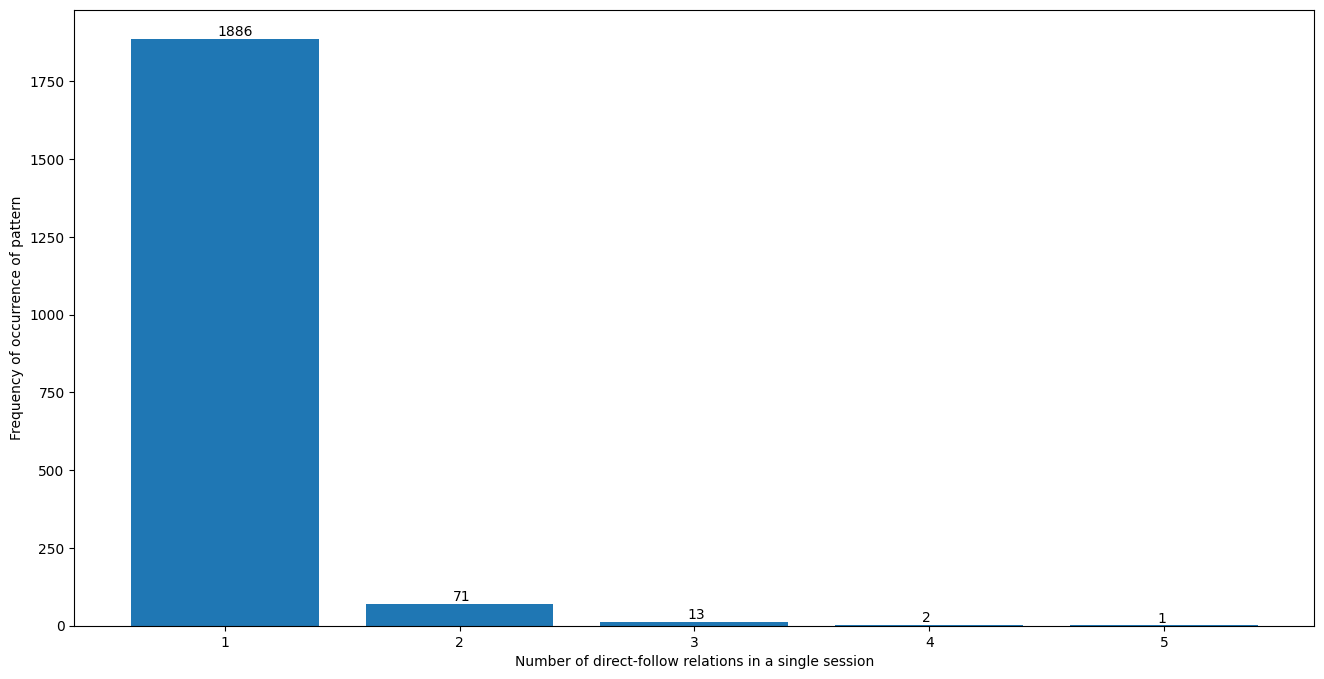

In [15]:
x = value_count_anomalies.index
y = value_count_anomalies.values

plt.figure(figsize=(16, 8))
#add point x = 10 and y = 0 manually
plt.bar(x,y)
plt.ylabel('Frequency of occurrence of pattern')
plt.xlabel('Number of direct-follow relations in a single session')

for index, value in enumerate(y):
    plt.text(index+0.97, value+10, str(value))

plt.savefig('repetition_figures/rep_dist_pattern_2.png');
plt.show()